## Pets Classification with Fast ai

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *

In [6]:
import os

In [16]:
fname_imag = get_image_files(os.path.join('./images'))

In [19]:
fname_imag[:5]

[PosixPath('images/Egyptian_Mau_167.jpg'),
 PosixPath('images/pug_52.jpg'),
 PosixPath('images/basset_hound_112.jpg'),
 PosixPath('images/Siamese_193.jpg'),
 PosixPath('images/shiba_inu_122.jpg')]

In [20]:
path_img = os.path.join('./images/')
path_anno = os.path.join('./annotations')

In [21]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [22]:
data = ImageDataBunch.from_name_re(path_img, fname_imag, pat, ds_tfms=get_transforms(), size=224, bs=16).normalize(imagenet_stats)

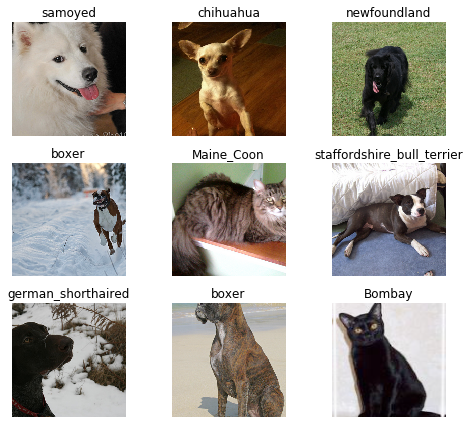

In [23]:
data.show_batch(rows=3, figsize=(7,6))

In [24]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [26]:
len(data.classes), data.c

(37, 37)

### Training Resnet34

In [27]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/kumarujjawal/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [28]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.938083,0.391044,0.126522,40:20
